In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Hopper experiment

#### Performance analysis

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'xhopperStdWoNoise'),
  Text(1, 0, 'xhopperStdWoNoiseAdptEnvVar'),
  Text(2, 0, 'xhopperStdWoNoiseAdptEnvVar2'),
  Text(3, 0, 'xhopperStdWoNoiseAdptEnvVar3'),
  Text(4, 0, 'xhopperStdWoNoiseAdptEnvVar4'),
  Text(5, 0, 'xhopperStdWoNoiseAdptEnvVar5'),
  Text(6, 0, 'xhopperStdWithNoise'),
  Text(7, 0, 'xhopperStdWithMinNoise-0.9'),
  Text(8, 0, 'xhopperStdWithMinNoise-Adaptive'),
  Text(9, 0, 'xhopperStdWithMinNoise-Adaptive-AdaptVar')])

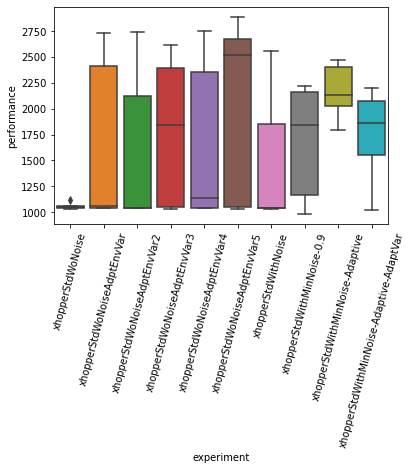

In [3]:
vStat = []
initSeed = 1
numSeed = 11
experiments = [
"xhopperStdWoNoise",
"xhopperStdWoNoiseAdptEnvVar",
"xhopperStdWoNoiseAdptEnvVar2",
"xhopperStdWoNoiseAdptEnvVar3",
"xhopperStdWoNoiseAdptEnvVar4",
"xhopperStdWoNoiseAdptEnvVar5",
"xhopperStdWithNoise",
#"xhopperStdWithMinNoise-1.5",
#"xhopperStdWithMinNoise-1.2",
"xhopperStdWithMinNoise-0.9",
"xhopperStdWithMinNoise-Adaptive",
"xhopperStdWithMinNoise-Adaptive-AdaptVar"
] #fill here the experiment

iev = []
cv = []

for experiment in experiments:
    for i in range(initSeed,numSeed):
        try:
            f = open(f"{experiment}/S{i}.fit", "r")
            vStat.append((experiment,i,float(f.read().split("bestgfit")[0].split("bestfit")[1].strip())))
        except:
            print(f"{experiment}/S{i}.fit didn't exist")            
            
        try:
            iev.append(np.load(f"{experiment}/S{i}.iev.npy", "r"))
            cv.append(np.load(f"{experiment}/S{i}.cv.npy", "r"))
        except:
            pass
            
#print(f"Average performance on {numSeed} seeds: {np.mean(vStat)} - Std deviation: {np.std(vStat)}")
df = pd.DataFrame(vStat,columns=['experiment','seed','performance'])
ax = sns.boxplot(x=df.experiment,y=df.performance)
plt.xticks(rotation=75)

In [3]:
for exp in experiments:
    print(f"Performance of experiment {exp} ({numSeed} seeds): {df[df['experiment']==exp]['performance'].mean()} +- {df[df['experiment']==exp]['performance'].std()}")

Performance of experiment xhopperStdWoNoise (11 seeds): 1055.084 +- 22.275256427006365
Performance of experiment xhopperStdWoNoiseAdptEnvVar (11 seeds): 1640.878 +- 770.9093546772467
Performance of experiment xhopperStdWoNoiseAdptEnvVar2 (11 seeds): 1514.517 +- 717.0595585529993
Performance of experiment xhopperStdWithNoise (11 seeds): 1498.959 +- 641.9654665764091
Performance of experiment xhopperStdWithMinNoise-0.9 (11 seeds): 1704.158 +- 526.6765211061193
Performance of experiment xhopperStdWithMinNoise-Adaptive (11 seeds): 2183.4839999999995 +- 227.52367448001735
Performance of experiment xhopperStdWithMinNoise-Adaptive-AdaptVar (11 seeds): 1793.5970000000002 +- 382.1937928459854


In [4]:
df[df['experiment']=='xhopperStdWoNoiseAdptEnvVar5']

,experiment,seed,performance
50,xhopperStdWoNoiseAdptEnvVar5,1,2458.68
51,xhopperStdWoNoiseAdptEnvVar5,2,1038.97
52,xhopperStdWoNoiseAdptEnvVar5,3,2890.05
53,xhopperStdWoNoiseAdptEnvVar5,4,2571.04
54,xhopperStdWoNoiseAdptEnvVar5,5,1032.99
55,xhopperStdWoNoiseAdptEnvVar5,6,1037.83
56,xhopperStdWoNoiseAdptEnvVar5,7,2656.86
57,xhopperStdWoNoiseAdptEnvVar5,8,2683.87
58,xhopperStdWoNoiseAdptEnvVar5,9,1075.84
59,xhopperStdWoNoiseAdptEnvVar5,10,2683.35


#### Noise Analysis - Standard Reward with PGN noise - no limitation

-- Loading data

In [5]:
seed = list(range(1,11))
motion = list(map(lambda x: x<5,seed))
noiseParameter = np.array([[-1.057036,-0.904793,-1.627683],
[-0.951210,-1.543393,-1.652689],
[-1.143012,-1.943825,-1.704224],
[-0.792456,-0.867625,-1.954244],
[-2.242359,-1.939327,-1.696721],
[-2.335426,-1.985879,-1.653965],
[-2.133642,-2.153280,-1.664309],
[-2.153533,-1.973502,-1.632281],
[-2.239090,-2.126331,-1.590877],
[-2.116482,-2.062976,-1.566676]])
noise0,noise1,noise2 = np.split(noiseParameter,3,axis=1)
data = zip(seed,motion,list(map(float,noise0)),list(map(float,noise1)),list(map(float,noise2)))
df = pd.DataFrame(data,columns=['seed','motion','noise0','noise1','noise2'])

**Ploting and Clustering**

Text(0, 0.5, 'noise1')

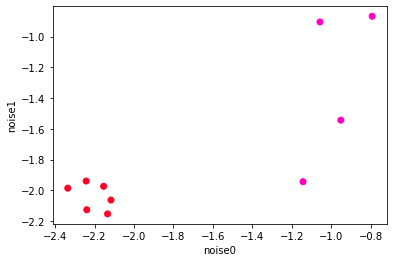

In [6]:
plt.scatter(df.iloc[:,2], df.iloc[:,3], c=df['motion'], cmap='gist_rainbow')
plt.xlabel('noise0')
plt.ylabel('noise1')

In [7]:
# importando e instanciando o modelo com valor pré-definido de k
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters = 2, random_state=1)

#treinando apenas com dois atributos
kmean.fit(df[['noise0','noise1']])
centers = kmean.cluster_centers_

Text(0.5, 1.0, 'Predicted')

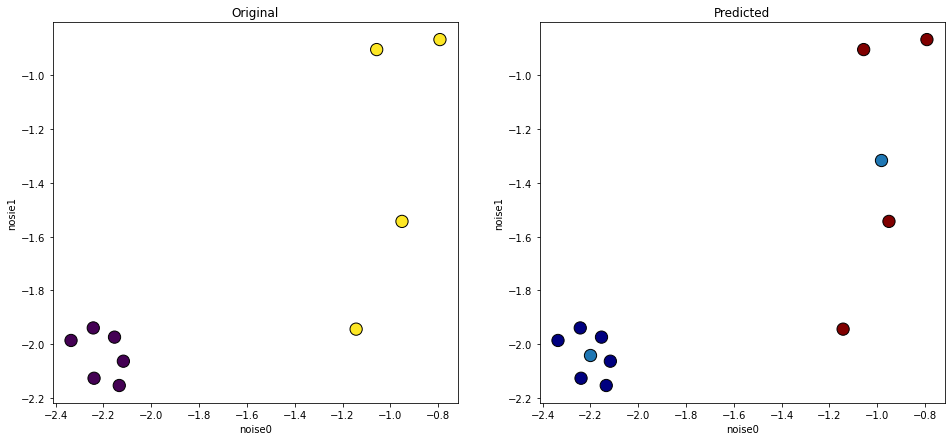

In [8]:
new_labels = kmean.labels_
# Plot the identified clusters and compare
fig, axes = plt.subplots(1, 2, figsize=(16,7))
axes[0].scatter(df.iloc[:,2], df.iloc[:,3], c=df['motion'], edgecolor='k', s=150)
axes[1].scatter(df.iloc[:,2], df.iloc[:,3], c=new_labels, cmap='jet', edgecolor='k', s=150)
axes[1].scatter(centers[:, 0], centers[:, 1], edgecolor='k', s=150)
axes[0].set_xlabel('noise0')
axes[0].set_ylabel('nosie1')
axes[1].set_xlabel('noise0')
axes[1].set_ylabel('noise1')
axes[0].set_title('Original')
axes[1].set_title('Predicted')

In [5]:
iev_cv_df = pd.DataFrame()
for i in range(10):    
    size = len(cv[i])
    iev_cv_df = pd.concat([iev_cv_df,pd.DataFrame({'seed':np.ones(size)*(i+1),'step':list(range(size)),'iev':list(iev[i])[:size],'cv':list(cv[i])})])

In [11]:
iev_cv_df[iev_cv_df['seed']==5]

,seed,step,iev,cv
0,5.0,0,0.305128,0.221797
1,5.0,1,0.343590,0.198569
2,5.0,2,0.291026,0.307469
3,5.0,3,0.158974,0.047740
4,5.0,4,0.203846,0.136187
...,...,...,...,...
185,5.0,185,0.332051,0.148034
186,5.0,186,0.398718,0.209382
187,5.0,187,0.351282,0.090431
188,5.0,188,0.307692,0.031353


3 5
8 6
10 2


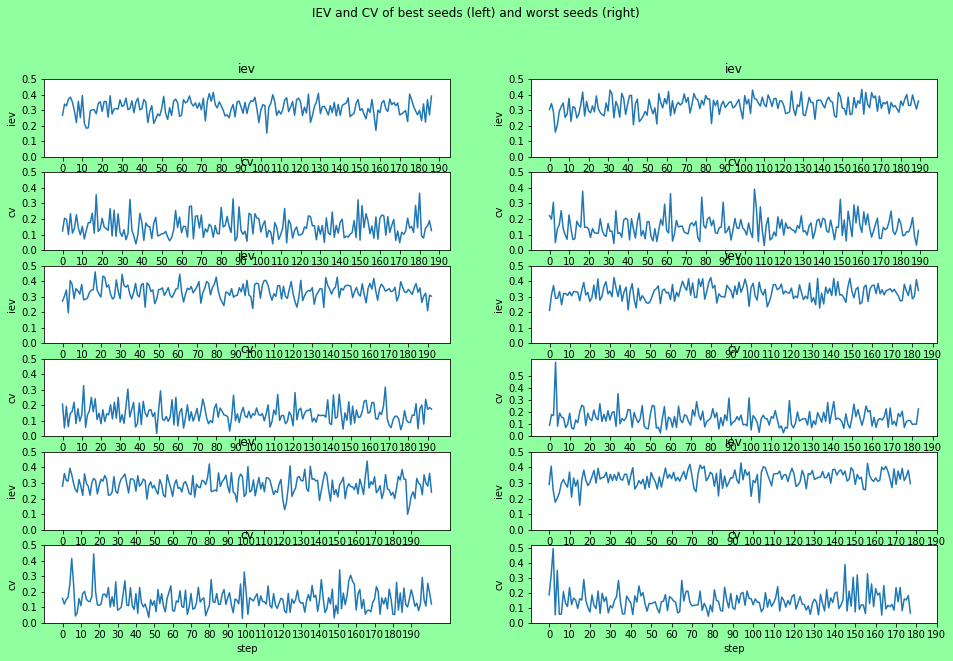

In [6]:
#adptEnvVar2 - no adjust with iev - only increasing or decreasing environmental variation using cv
seed_best = [4,10,7]
seed_worst = [2,9,6]

#adptEnvVar3 - mean_iev>.30 in the last 500 generations got reset
seed_best = [1,3,10]
seed_worst = [9,5,2]

#adptEnvVar4 - mean_iev>.32 in the last 500 generations got reset
seed_best = [6,10,8];
seed_worst = [9,3,4]

#adptEnvVar5 - mean_iev>.32 in the last 500 generations got reset
seed_best = [3,8,10];
seed_worst = [5,6,2]

fig, axes = plt.subplots(6,2,figsize=(16,10))
fig.suptitle('IEV and CV of best seeds (left) and worst seeds (right)')
fig.patch.set_facecolor('xkcd:mint green')

max_x_ticks = 200
step_x_ticks = 10

for i, seed in enumerate(zip(seed_best,seed_worst)):
    print(seed[0],seed[1])
    g = sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[0]],x='step',y='iev',ax=axes[i*2,0])
    g.set_xticks(range(0,max_x_ticks,step_x_ticks))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2,0].set_title('iev')
    #axes[i*2,0].xticks(len(range(1000)),range(1000))

    g=sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[0]],x='step',y='cv',ax=axes[i*2+1,0])
    g.set_xticks(range(0,max_x_ticks,step_x_ticks))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2+1,0].set_title('cv')

    #axes[i*2+1,0].xticks(len(range(1000)),range(1000))

    g=sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[1]],x='step',y='iev',ax=axes[i*2,1])
    g.set_xticks(range(0,max_x_ticks,step_x_ticks))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2,1].set_title('iev')

    #axes[i*2,1].xticks(len(range(1000)),range(1000))

    g=sns.lineplot(data=iev_cv_df[iev_cv_df['seed']==seed[1]],x='step',y='cv',ax=axes[i*2+1,1])
    g.set_xticks(range(0,max_x_ticks,step_x_ticks))
    g.set_yticks(np.arange(0,0.6,0.1))
    axes[i*2+1,1].set_title('cv')
    

    #axes[i*2+1,1].xticks(len(range(1000)),range(1000))

In [13]:
iev_cv_df[iev_cv_df['seed']==2]

,seed,step,iev,cv
0,2.0,0,0.291026,0.187380
1,2.0,1,0.408974,0.320019
2,2.0,2,0.253846,0.498467
3,2.0,3,0.175641,0.053639
4,2.0,4,0.202564,0.352676
...,...,...,...,...
173,2.0,173,0.394872,0.081453
174,2.0,174,0.316667,0.159874
175,2.0,175,0.341026,0.153162
176,2.0,176,0.382051,0.183179


In [7]:
vec = []
seed = list(range(1,11))
moving_average_df = pd.DataFrame()
count=1
for i in range(10,150,25):    
    lowLim = i
    upLim = i+25    
    pivot_table = pd.pivot_table(iev_cv_df.drop('cv',axis=1)[(iev_cv_df['step']>lowLim) & (iev_cv_df['step']<upLim)], values=['iev'], index=['seed'], aggfunc=[min,max,np.mean,np.std])
    moving_average_df = pd.concat([moving_average_df,pd.DataFrame({'seed':seed,'ievMean':pivot_table['mean']['iev'].values,'step':np.ones(10)*count})])
    count+=1


In [8]:
moving_average_df['success']=False
moving_average_df.loc[moving_average_df['seed'].isin(seed_best),'success']=True

Text(0, 0.5, 'IEV Moving Average')

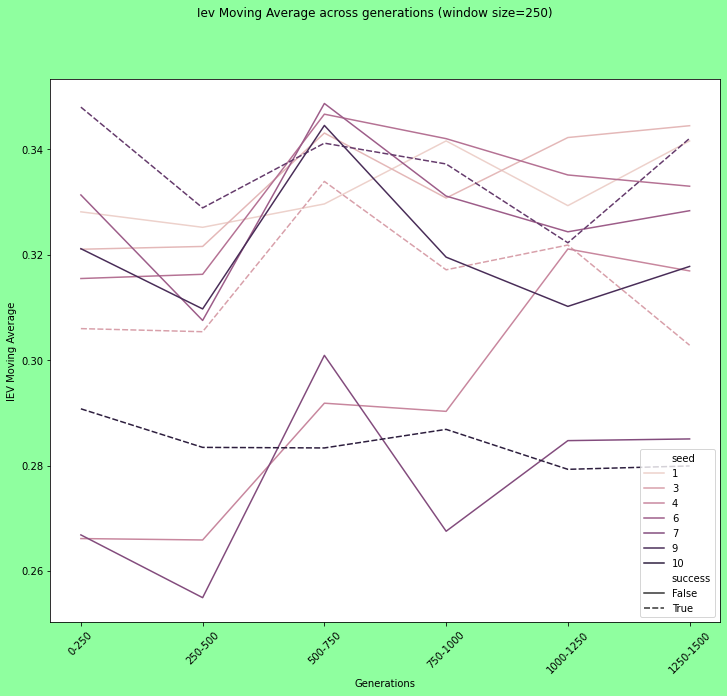

In [9]:
fig, ax = plt.subplots(figsize=(12,10))
fig.patch.set_facecolor('xkcd:mint green')
g=sns.lineplot(data=moving_average_df,y='ievMean',x='step',hue='seed',style='success',ax=ax)
plt.legend(loc='lower right')
ax.set_xticks(range(1,7))
a=ax.set_xticklabels(('0-250','250-500','500-750','750-1000','1000-1250','1250-1500'),rotation=45)
fig.suptitle('Iev Moving Average across generations (window size=250)')
plt.xlabel('Generations')
plt.ylabel('IEV Moving Average')

In [82]:
iev_cv_df.describe()

,seed,step,iev,cv
count,1912.000000,1912.000000,1912.000000,1912.000000
mean,5.561715,95.284519,0.314298,0.148589
std,2.865438,55.529661,0.056423,0.066364
min,1.000000,0.000000,0.098718,0.014301
25%,3.000000,47.000000,0.276923,0.101295
50%,6.000000,95.000000,0.317949,0.139950
75%,8.000000,143.000000,0.355128,0.186230
max,10.000000,204.000000,0.458974,0.612439


In [18]:
iev_cv_df[(iev_cv_df['seed']==4)&(iev_cv_df['step']<10)]['iev'].mean()

0.3166666666666667

In [29]:
iev_cv_df[(iev_cv_df['seed']==10)&(iev_cv_df['step']<10)]['iev'].mean()

0.31397435897435894